#  ARTIFICIAL NEURAL NETWORKS

## Classification Using Artificial Neural Networks with Hyperparameter Tuning on Alphabets Data

## import libraries

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [91]:
import warnings
warnings.filterwarnings('ignore')

## load dataset 

In [92]:
df= pd.read_csv('D:\\ds assignment question\\Alphabets_data.csv')

In [106]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,Prediction
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,22.0
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,16.0
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,19.0
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,8.0
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7,NaN
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7,NaN
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4,NaN
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8,NaN


## check for datatype

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   letter      20000 non-null  object 
 1   xbox        20000 non-null  int64  
 2   ybox        20000 non-null  int64  
 3   width       20000 non-null  int64  
 4   height      20000 non-null  int64  
 5   onpix       20000 non-null  int64  
 6   xbar        20000 non-null  int64  
 7   ybar        20000 non-null  int64  
 8   x2bar       20000 non-null  int64  
 9   y2bar       20000 non-null  int64  
 10  xybar       20000 non-null  int64  
 11  x2ybar      20000 non-null  int64  
 12  xy2bar      20000 non-null  int64  
 13  xedge       20000 non-null  int64  
 14  xedgey      20000 non-null  int64  
 15  yedge       20000 non-null  int64  
 16  yedgex      20000 non-null  int64  
 17  Prediction  3734 non-null   float64
dtypes: float64(1), int64(16), object(1)
memory usage: 2.7+ MB


### summary statistics

In [108]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,Prediction
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,3734.000000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120,12.278522
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747,7.471247
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000,6.000000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000,12.000000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000,19.000000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000,25.000000


## 1. Data Exploration and Preprocessing

### check for missing alues

In [109]:
df.isnull().sum()

letter            0
xbox              0
ybox              0
width             0
height            0
onpix             0
xbar              0
ybar              0
x2bar             0
y2bar             0
xybar             0
x2ybar            0
xy2bar            0
xedge             0
xedgey            0
yedge             0
yedgex            0
Prediction    16266
dtype: int64

#### observation:
no missing values present

### check for duplicates

In [110]:
df[df.duplicated()]

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,Prediction
627,I,3,7,4,5,2,7,7,0,7,13,6,8,0,8,1,7,2.0
998,H,1,1,2,1,1,7,7,12,1,7,6,8,3,8,0,8,22.0
1873,X,3,7,5,5,2,9,7,1,8,10,4,7,3,8,3,8,21.0
2522,I,1,4,2,3,1,7,7,0,7,13,6,8,0,8,1,8,3.0
3067,N,6,10,6,8,3,7,7,15,2,4,6,8,6,8,0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19928,L,3,4,3,6,1,0,1,5,6,0,0,7,0,8,0,8,NaN
19941,L,1,0,1,0,0,2,2,5,4,1,2,6,0,8,0,8,NaN
19948,T,4,5,4,4,2,6,11,2,7,11,9,4,1,11,2,4,NaN
19950,O,4,5,5,4,3,7,7,8,5,7,6,8,2,8,3,8,NaN


### remove duplicates

In [111]:
df = df.drop_duplicates()

### encoding the letter column

In [112]:
LabelEncoder = LabelEncoder()
df['letter'] = LabelEncoder.fit_transform(df['letter'])

In [113]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex,Prediction
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,22.0
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,16.0
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,19.0
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,8.0
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7,NaN
19996,2,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7,NaN
19997,19,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4,NaN
19998,18,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8,NaN


In [54]:
df['letter'].value_counts()

letter
15    782
20    768
3     760
16    760
0     756
5     752
19    748
24    746
6     743
17    737
12    732
1     730
18    729
22    726
4     725
14    718
10    718
9     715
2     710
21    706
7     704
13    688
23    678
11    673
25    640
8     524
Name: count, dtype: int64

<Axes: xlabel='letter', ylabel='count'>

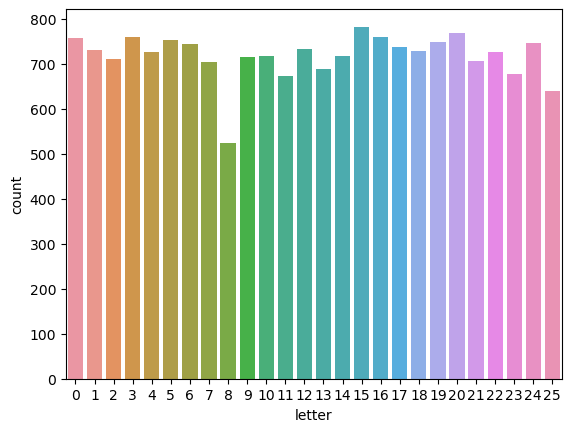

In [55]:
sns.countplot(data=df,x='letter')

## Divide the dataset into X and y

In [56]:
X = df.drop('letter', axis=1)
y = df['letter']


### scaling the dataset

In [57]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [58]:
y

0        19
1         8
2         3
3        13
4         6
         ..
19994    19
19995     3
19996     2
19997    19
19999     0
Name: letter, Length: 18668, dtype: int64

### spliting data into train and test 

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Model Implementation

In [64]:
import os
os.getcwd()
os.chdir('C:\\your\\path\\from\\python')

In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [66]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(LabelEncoder.classes_), activation='softmax'))

In [67]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [68]:
history=model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2821 - loss: 2.5940 - val_accuracy: 0.6297 - val_loss: 1.2426
Epoch 2/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6903 - loss: 1.1026 - val_accuracy: 0.7211 - val_loss: 0.9387
Epoch 3/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7621 - loss: 0.8245 - val_accuracy: 0.7697 - val_loss: 0.7907
Epoch 4/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7981 - loss: 0.7146 - val_accuracy: 0.7877 - val_loss: 0.7075
Epoch 5/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8204 - loss: 0.6024 - val_accuracy: 0.8102 - val_loss: 0.6360
Epoch 6/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8383 - loss: 0.5518 - val_accuracy: 0.8276 - val_loss: 0.5807
Epoch 7/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8571 - loss: 0.4931 - val_accuracy: 0.8396 - val_loss: 0.5309
Epoch 8/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8670 - loss: 0.4574 - val_accuracy: 0.

In [69]:
scores = model.evaluate(X_scaled, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9624 - loss: 0.1255
compile_metrics: 95.66%


In [70]:
history.history.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

# summarize history for accuracy

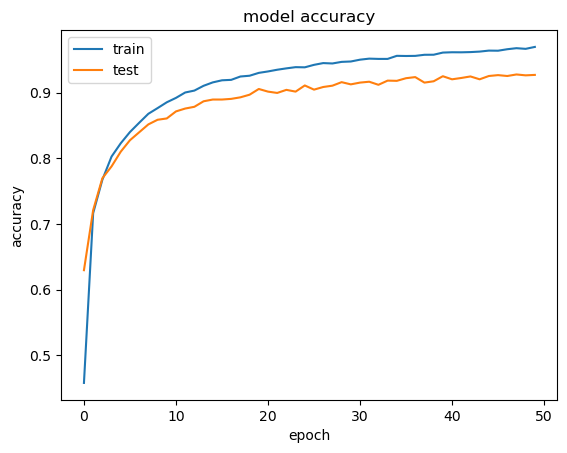

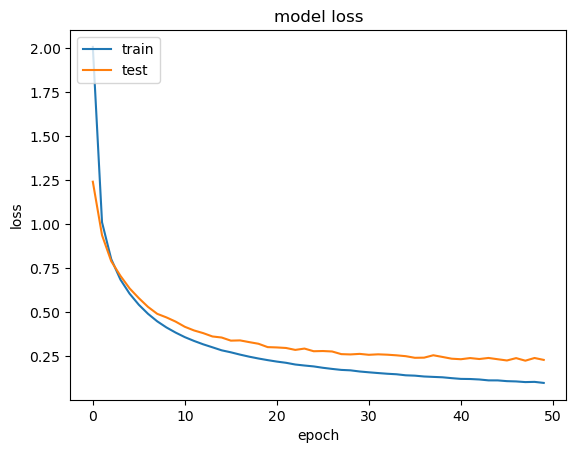

In [89]:

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


## Hyperparameter Tuning

In [72]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV,KFold
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [73]:
 # Function to create model

def create_model():
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(LabelEncoder.classes_), activation='softmax'))    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [74]:
# create a model
model = KerasClassifier(build_fn=create_model, verbose=0)

In [75]:
# define a grid search parameters 
batch_size=[16, 32, 64]
epochs=[50,100]

In [76]:
# make a dictonary of the gridsearch parameters
param_grid=dict(batch_size=batch_size,epochs=epochs,)

In [77]:
# built and fit the gridseachcv
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result=grid.fit(X_train,y_train)
grid_result

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START batch_size=16, epochs=50....................................
[CV 1/5; 1/6] END .....batch_size=16, epochs=50;, score=0.919 total time=  47.5s
[CV 2/5; 1/6] START batch_size=16, epochs=50....................................
[CV 2/5; 1/6] END .....batch_size=16, epochs=50;, score=0.919 total time=  42.9s
[CV 3/5; 1/6] START batch_size=16, epochs=50....................................
[CV 3/5; 1/6] END .....batch_size=16, epochs=50;, score=0.910 total time=  49.1s
[CV 4/5; 1/6] START batch_size=16, epochs=50....................................
[CV 4/5; 1/6] END .....batch_size=16, epochs=50;, score=0.922 total time=  45.9s
[CV 5/5; 1/6] START batch_size=16, epochs=50....................................
[CV 5/5; 1/6] END .....batch_size=16, epochs=50;, score=0.917 total time=  49.1s
[CV 1/5; 2/6] START batch_size=16, epochs=100...................................
[CV 1/5; 2/6] END ....batch_size=16, epochs=100;,

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KerasClassifier(build_fn=<function create_model at 0x00000166D4DCB380>, verbose=0),
             param_grid={'batch_size': [16, 32, 64], 'epochs': [50, 100]},
             verbose=10)

In [78]:
grid_result.best_score_

0.922860863249567

In [80]:
grid_result.best_params_

{'batch_size': 16, 'epochs': 100}

## Evaluate the Model on best parameter

In [100]:
y_pred = grid.predict(X_test)
y_pred

array([22, 16, 19, ...,  1, 11,  3], dtype=int64)

In [117]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.9317086234600964
Precision: 0.9327572701441746
Recall: 0.9317086234600964
F1-score: 0.9316792380912214


## conclusion:
In this Assignment, we aimed to build and optimize a neural network model using the GridSearchCV method to classify alphabets from a dataset.